In [10]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # data visualization
import seaborn as sns

**Reading the data**

In [2]:
original_data = pd.read_csv('Titanic-Dataset.csv')

**Data Analysis**

In [15]:
copy_data = original_data.copy()
copy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


891 examples and 11 features (2 are float, 5 are int and 5 are obj) + the target variable (survived)

In [16]:
copy_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


38% survived

In [17]:
copy_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


1. Some features need to be converted into numeric ones (in order for the ml algorithms to be able to process them)
2. Features vary in range -> need to be converted into the same scale
3. There are some missing values that need to be dealt with

**Handling missing values**

In [18]:
missing_values = (copy_data.isnull().sum()/len(copy_data))*100
print(missing_values)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


'Embarked': 2 missing values<br>
'Age': about 20% missing<br>
'Cabin': 77% missing<br>

In [19]:
copy_data.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

Irrelevant features? PassengerID, Ticket and Name 

**Comparing the age distribution of both sexes based on their survival status**

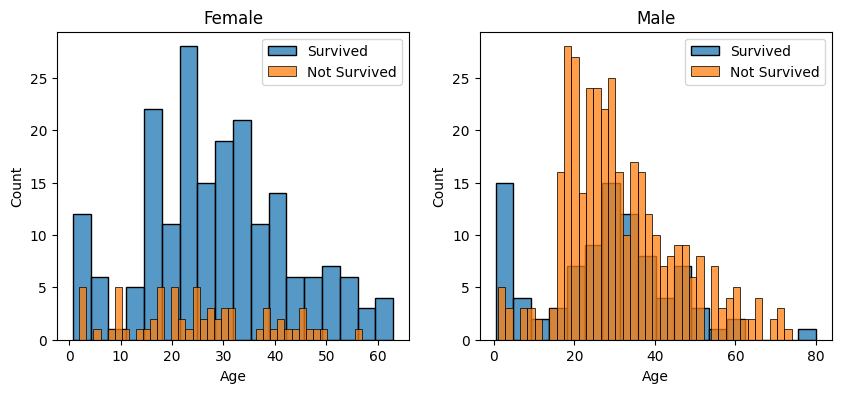

In [25]:
# filter data for females and males
women = copy_data[copy_data['Sex'] == 'female']
men = copy_data[copy_data['Sex'] == 'male']

# subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

"""
-> 'kde' parameter controls whether a Kernel Density Estimate (KDE) plt should be displayed along with the histogram
-> When 'kde=True', seaborn will overlay a smooth KDE curve on top of the histogram bars,
else, they'll be shown without it (just plot the histogram)

-> 'ax' parameter specifies the subplot (or axis) where the plot will be drawn.
"""

"""
-> 'ax=axes[0]' specifies the first (left) subplot , along with 'kde=False', this ensures that only the histogram
 is displayed for the age distribution of survived and not survived females.
"""
# age distrbution for survived females
sns.histplot(women[women['Survived'] == 1]['Age'].dropna(), bins=18, label='Survived', ax=axes[0], kde=False)
# age distrbution for not survived females
sns.histplot(women[women['Survived'] == 0]['Age'].dropna(), bins=40, label='Not Survived', ax=axes[0], kde=False)

axes[0].legend()
axes[0].set_title('Female')

# age distrbution for survived males
sns.histplot(men[men['Survived'] == 1]['Age'].dropna(), bins=18, label='Survived', ax=axes[1], kde=False)
# age distrbution for not survived males
sns.histplot(men[men['Survived'] == 0]['Age'].dropna(), bins=40, label='Not Survived', ax=axes[1], kde=False)

axes[1].legend()
axes[1].set_title('Male')

plt.show()


<ul>
   <li>men have a high probability of survival when they are between 18 and 30 years old</li>
   <li>women the survival chances are higher between 14 and 40</li>
   <li>men's probability of survival is very low between the age of 5 and 18, unlike women</li>
   <li>babies have a higher probability of survival</li>
</ul>

@TODO create age groups


In [7]:
# more than 70 % missing values therefore dropped the whole column
copy_data.drop('Cabin', axis=1, inplace=True)

In [8]:
# replacing null values in the 'Age' column with the mean of the rest of the column's values
copy_data['Age'].fillna(copy_data['Age'].mean(), inplace=True)

<Axes: ylabel='Count'>

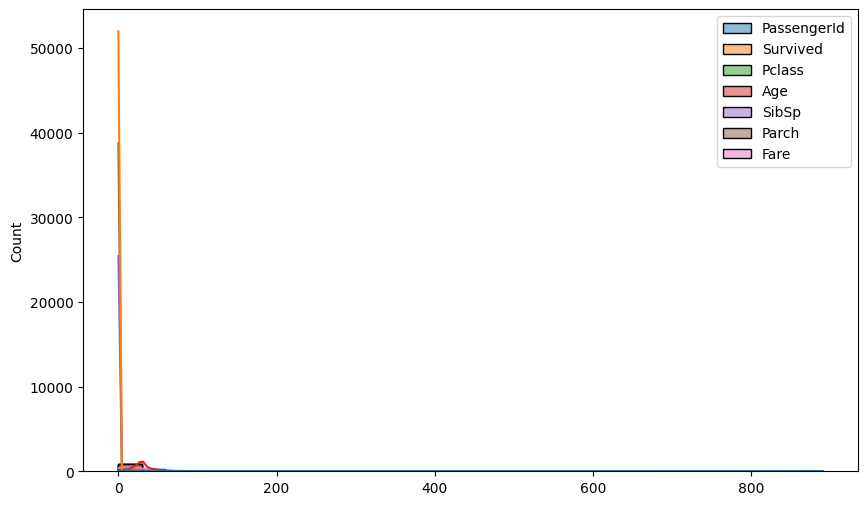